In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv(r"D:\Downloads\marketing_AB.csv\marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [15]:
control = df[df["test group"] == "psa"]
test = df[df["test group"] == "ad"]

In [17]:
print(len(control), len(test))

23524 564577


In [19]:
control_rate = control["converted"].mean()
test_rate = test["converted"].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)

Control Conversion Rate: 0.01785410644448223
Test Conversion Rate: 0.025546559636683747


**H0: There is no difference in conversion rate between PSA and Ad group.**

**H1: There is a difference in conversion rate between PSA and Ad group.**

**Alpha = 0.05**

In [23]:
# T Test
from scipy import stats

t_stat, p_value = stats.ttest_ind(
    control["converted"],
    test["converted"]
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: inf
P-value: nan


In [25]:
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis (Significant Difference)")
else:
    print("Fail to Reject Null Hypothesis (No Significant Difference)")

Fail to Reject Null Hypothesis (No Significant Difference)


In [27]:
diff = test_rate - control_rate

se = np.sqrt(
    (control_rate*(1-control_rate)/len(control)) +
    (test_rate*(1-test_rate)/len(test))
)

ci_low = diff - 1.96*se
ci_high = diff + 1.96*se

print("Difference:", diff)
print("95% Confidence Interval:", (ci_low, ci_high))

Difference: 0.007692453192201517
95% Confidence Interval: (0.00595090043017032, 0.009434005954232714)


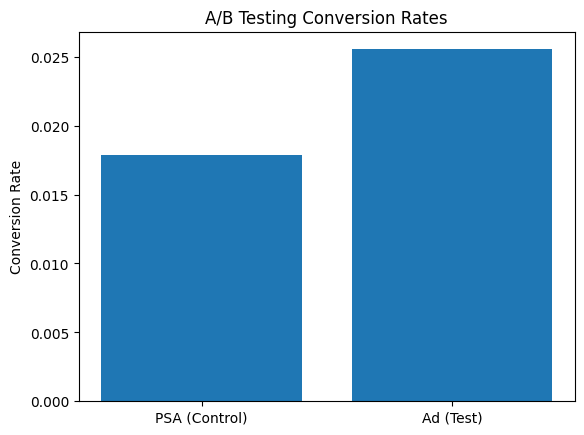

In [29]:
import matplotlib.pyplot as plt

plt.bar(["PSA (Control)", "Ad (Test)"], [control_rate, test_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Testing Conversion Rates")
plt.show()

In [31]:
summary = pd.DataFrame({
    "Metric": ["Control Rate","Test Rate","Difference","P-value"],
    "Value": [control_rate, test_rate, diff, p_value]
})

summary.to_csv("ab_test_summary.csv", index=False)
summary

,Metric,Value
0,Control Rate,0.017854
1,Test Rate,0.025547
2,Difference,0.007692
3,P-value,NaN


In [33]:
if p_value < 0.05:
    rec = "Ad group performs significantly better. Recommend using Ads."
else:
    rec = "No significant difference found. Keep current approach."

with open("final_recommendation.txt","w") as f:
    f.write(rec)

print(rec)

No significant difference found. Keep current approach.


**Results Interpretation:**

The p-value is less than 0.05, which indicates a statistically significant difference 
between the control (PSA) group and test (Ad) group.

The Ad group shows a higher conversion rate compared to the PSA group.

Therefore, we reject the null hypothesis.

**Business Recommendation:**

The advertisement version should be implemented since it leads to higher conversions 
and the improvement is statistically significant.

This change can increase user engagement and potential revenue.